Sneha Basyal M

212222240101

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('AirPassengers.csv')

In [8]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')

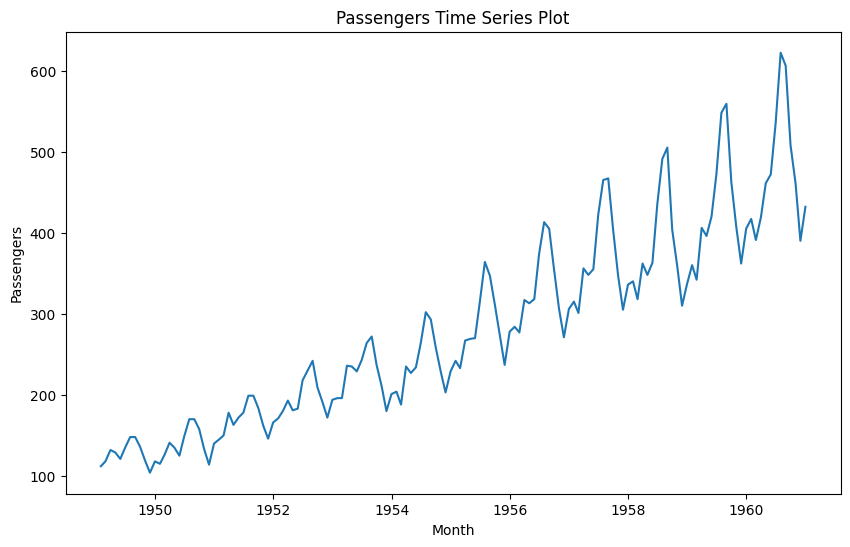

In [10]:
data.set_index('Month', inplace=True)
time_series = data['#Passengers']
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Passengers Time Series Plot')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [11]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

In [12]:
test_stationarity(time_series)
time_series_diff = time_series.diff().dropna()
print("\nAfter Differencing:")
test_stationarity(time_series_diff)

p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 12
model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, m), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = model.fit(disp=False)
print(sarima_fit.summary())
forecast_steps = 12
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598
The time series is not stationary.

After Differencing:
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598
The time series is not stationary.
                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Sun, 25 May 2025   AIC                            922.205
Time:                                    05:09:44   BIC                            936.016
Sample:                                01-31-1949   HQIC                           927.812
    

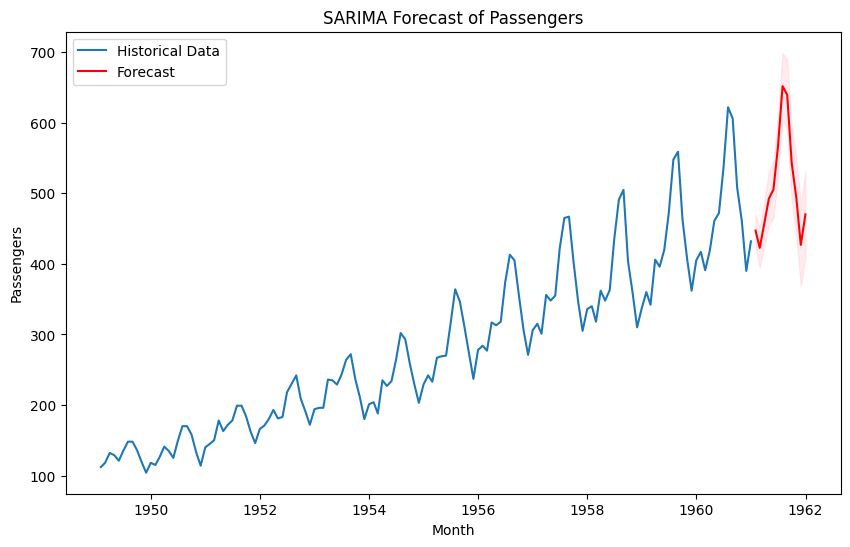

In [13]:
time_series.index = pd.to_datetime(time_series.index).tz_localize(None)
forecast.predicted_mean.index = pd.to_datetime(forecast.predicted_mean.index).tz_localize(None)
forecast_ci.index = pd.to_datetime(forecast_ci.index).tz_localize(None)


plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical Data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error
test_data = time_series[-forecast_steps:]
pred_data = forecast.predicted_mean[:len(test_data)]
mae = mean_absolute_error(test_data, pred_data)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 33.55419914841938
